### For this assignments I preffered the class lecture for crawling the website. I present my learning on link_ analysis below

### Here I am crawling the FoxNews website for the links

In [3]:
import scrapy

class DmozSpider(scrapy.Spider):
    name = "FOXNEWS"
    allowed_domains = ["Foxnews.com"]
    start_urls = ["http://www.foxnews.com/"]

    def parse(self, response):
                  f.write(response.body)

### Running scrappy to get a response from a URL

In [4]:
import requests
from scrapy.http import TextResponse

r = requests.get('http://www.foxnews.com/')
response = TextResponse(r.url, body=r.text, encoding='utf-8')

In [5]:
print response

<200 http://www.foxnews.com/>


In [6]:
response.xpath('//title')

[<Selector xpath='//title' data=u'<title>Fox News - Breaking News Updates '>]

### Extracting title text from the the response

In [7]:
response.xpath('//title/text()').extract()

[u'Fox News - Breaking News Updates | Latest News Headlines | Photos & News Videos']

### Extracting the responses with from the the response '//ul/li'

In [8]:
response.xpath('//ul/li')

[<Selector xpath='//ul/li' data=u'<li class="menu-news"><a href="//www.fox'>,
 <Selector xpath='//ul/li' data=u'<li class="menu-news"><a href="//www.fox'>,
 <Selector xpath='//ul/li' data=u'<li class="menu-opinion"><a href="//www.'>,
 <Selector xpath='//ul/li' data=u'<li class="menu-politics"><a href="//www'>,
 <Selector xpath='//ul/li' data=u'<li class="menu-entertainment desktop"><'>,
 <Selector xpath='//ul/li' data=u'<li class="menu-business desktop"><a hre'>,
 <Selector xpath='//ul/li' data=u'<li class="menu-lifestyle desktop"><a hr'>,
 <Selector xpath='//ul/li' data=u'<li class="menu-tv desktop"><a href="//w'>,
 <Selector xpath='//ul/li' data=u'<li class="menu-radio desktop"><a href="'>,
 <Selector xpath='//ul/li' data=u'<li class="menu-more"><a href="#" class='>,
 <Selector xpath='//ul/li' data=u'<li><a href="http://www.foxnews.com/worl'>,
 <Selector xpath='//ul/li' data=u'<li><a href="http://www.foxnews.com/us/2'>,
 <Selector xpath='//ul/li' data=u'<li><a href="http://www.foxnew

In [9]:
response.xpath('//ul/li/a/@href').extract()

[u'//www.foxnews.com/us.html',
 u'//www.foxnews.com/world.html',
 u'//www.foxnews.com/opinion.html',
 u'//www.foxnews.com/politics.html',
 u'//www.foxnews.com/entertainment.html',
 u'//www.foxbusiness.com',
 u'//www.foxnews.com/lifestyle.html',
 u'//www.foxnews.com/shows.html',
 u'//radio.foxnews.com',
 u'#',
 u'http://www.foxnews.com/world/2017/11/18/signals-may-be-from-missing-sub-argentinas-navy-says.html',
 u'http://www.foxnews.com/us/2017/11/18/wwii-veteran-calls-for-help-and-dies-as-nurses-laugh-video-shows.html',
 u'http://www.foxnews.com/sports/2017/11/17/jerry-jones-vs-roger-goodell-battle-for-nfls-soul.html',
 u'#',
 u'#',
 u'#',
 u'//www.foxbusiness.com/markets.html',
 u'//www.foxnews.com/category/us/crime.html',
 u'//www.foxnews.com/category/us/military.html',
 u'//www.foxnews.com/category/us/education.html',
 u'//www.foxnews.com/category/us/terror.html',
 u'//www.foxnews.com/category/us/immigration.html',
 u'//www.foxnews.com/category/us/economy.html',
 u'//www.foxnews.com

### Preparing data frame with links as a column

In [27]:
import pandas as pd
#response.xpath('//ul/li/a/@href').extract()
data_frame= pd.DataFrame(response.xpath('//ul/li/a/@href').extract())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 110)
print data_frame

                                                                                                                 0
0                                                                                        //www.foxnews.com/us.html
1                                                                                     //www.foxnews.com/world.html
2                                                                                   //www.foxnews.com/opinion.html
3                                                                                  //www.foxnews.com/politics.html
4                                                                             //www.foxnews.com/entertainment.html
5                                                                                            //www.foxbusiness.com
6                                                                                 //www.foxnews.com/lifestyle.html
7                                                                               

### For each of these links, I will find the connected urls and construct a stochastic matrix  to perform the analysis on. I have taken few sample links on which I will build the stochastic matrix

1. http://www.foxnews.com/politics.html

2. http://www.foxnews.com/world/2017/11/18/signals-may-be-from-missing-sub-argentinas-navy-says.html

3. http://www.foxnews.com/category/health/healthy-living/childrens-health.html

4. http://www.foxnews.com/about/apps-downloads

5. http://video.foxnews.com/playlist/entertainment-latest-entertainment/

6. http://video.foxnews.com/v/5646127682001/

7. http://www.foxnews.com/radio/

8. http://careers.foxnews.com/students

9. http://twitter.com/foxnews

10. http://help.foxnews.com/index.html



### For each link I created a dataframe which contains its connected links

In [30]:
import requests
from scrapy.http import TextResponse
import pandas as pd

request2 = requests.get('http://www.foxnews.com/politics.html')
response2 = TextResponse(request2.url, body=request2.text, encoding='utf-8')
data_frame2= pd.DataFrame(response2.xpath('//ul/li/a/@href').extract())
print data_frame2

                                                                          0
0                                                 //www.foxnews.com/us.html
1                                              //www.foxnews.com/world.html
2                                            //www.foxnews.com/opinion.html
3                                           //www.foxnews.com/politics.html
4                                      //www.foxnews.com/entertainment.html
5                                                     //www.foxbusiness.com
6                                          //www.foxnews.com/lifestyle.html
7                                              //www.foxnews.com/shows.html
8                                                       //radio.foxnews.com
9                                                                         #
10                                 //www.foxnews.com/category/us/crime.html
11                              //www.foxnews.com/category/us/military.html
12          

In [33]:
import requests
from scrapy.http import TextResponse
import pandas as pd

request3 = requests.get('http://www.foxnews.com/world/2017/11/18/signals-may-be-from-missing-sub-argentinas-navy-says.html')
response3 = TextResponse(request3.url, body=request3.text, encoding='utf-8')
dataframe3= pd.DataFrame(response3.xpath('//ul/li/a/@href').extract())
print dataframe3

                                                                                                             0
0                                                                                    //www.foxnews.com/us.html
1                                                                                 //www.foxnews.com/world.html
2                                                                               //www.foxnews.com/opinion.html
3                                                                              //www.foxnews.com/politics.html
4                                                                         //www.foxnews.com/entertainment.html
5                                                                                        //www.foxbusiness.com
6                                                                             //www.foxnews.com/lifestyle.html
7                                                                                 //www.foxnews.com/shows.html
8

In [41]:
import requests
from scrapy.http import TextResponse
import pandas as pd

request5 = requests.get('http://www.foxnews.com/category/health/healthy-living/childrens-health.html')
response5 = TextResponse(request5.url, body=request5.text, encoding='utf-8')
dataframe5= pd.DataFrame(response5.xpath('//ul/li/a/@href').extract())
print dataframe5

                                                                          0
0                                                 //www.foxnews.com/us.html
1                                              //www.foxnews.com/world.html
2                                            //www.foxnews.com/opinion.html
3                                           //www.foxnews.com/politics.html
4                                      //www.foxnews.com/entertainment.html
5                                                     //www.foxbusiness.com
6                                          //www.foxnews.com/lifestyle.html
7                                              //www.foxnews.com/shows.html
8                                                       //radio.foxnews.com
9                                                                         #
10                                 //www.foxnews.com/category/us/crime.html
11                              //www.foxnews.com/category/us/military.html
12          

In [45]:
import requests
from scrapy.http import TextResponse
import pandas as pd

request6 = requests.get('http://www.foxnews.com/about/apps-downloads')
response6 = TextResponse(request6.url, body=request6.text, encoding='utf-8')
dataframe6= pd.DataFrame(response2.xpath('//ul/li/a/@href').extract())
print dataframe6

                                                    0
0                                       //foxnews.com
1                                   //foxbusiness.com
2                                 //www.foxnewsgo.com
3                                 //radio.foxnews.com
4                                //nation.foxnews.com
5                               //foxnewsinsider.com/
6                                   //www.foxnews.com
7                                 //video.foxnews.com
8                     //www.foxnews.com/politics.html
9                           //www.foxnews.com/us.html
10                     //www.foxnews.com/opinion.html
11                              //www.foxbusiness.com
12               //www.foxnews.com/entertainment.html
13                        //www.foxnews.com/tech.html
14                     //www.foxnews.com/science.html
15                      //www.foxnews.com/health.html
16                      //www.foxnews.com/travel.html
17                   //www.f

In [49]:
import requests
from scrapy.http import TextResponse
import pandas as pd

request8 = requests.get('http://video.foxnews.com/playlist/entertainment-latest-entertainment/')
response8 = TextResponse(request8.url, body=request8.text, encoding='utf-8')
dataframe8= pd.DataFrame(response8.xpath('//ul/li/a/@href').extract())
print dataframe8

                                                                             0
0                                                           //www.foxnews.com/
1          //video.foxnews.com/v/1241186546001/fox-news-channel/#sp=watch-live
2                                                  //www.foxnews.com/trending/
3                                                                            #
4                                                          //watch.foxnews.com
5                                           //video.foxnews.com?#sp=show-clips
6                                           //video.foxnews.com?#sp=news-clips
7                           //video.foxnews.com/v/5599024308001/fox-news-radio
8                                                                            #
9                                        //www.foxnews.com/politics/index.html
10                             //www.foxnews.com/politics/elections/index.html
11                      //www.foxnews.com/politics/e

In [53]:
import requests
from scrapy.http import TextResponse
import pandas as pd

request9 = requests.get('http://careers.foxnews.com/students')
response9 = TextResponse(request9.url, body=request9.text, encoding='utf-8')
dataframe9= pd.DataFrame(response9.xpath('//ul/li/a/@href').extract())
print dataframe9

                                                      0
0                                                     /
1                                                 /jobs
2                                             /students
3                                                     /
4                                                 /jobs
5                                                /about
6                           /frequently-asked-questions
7   http://careers.foxnews.com/privacy-policy#ad-choice
8                                       /privacy-policy
9                                            /terms-use
10                                           /terms-new
11                                   http://foxnews.com
12                             http://radio.foxnews.com
13                               http://foxbusiness.com
14                              http://fncu.foxnews.com
15                                 http://foxnation.com
16                            http://foxnewsinsi

### Similarly the dataframes has to be created to the other links as well to know their outgoing/incoming links

To build the stochastic matrix we must divide the number of incoming links from i to j with the number of outlinks from i. Here i and j are rows and columns respectively. so in order to know the inlinks and outlinks for an URL we sould first build a matrix with elements which shows 1 if it has link out of i into j else 0.  This matrix is known as connectivity matrix.

#### Connectivity Matrix 

[1,0,1,0,1,1,1,1,1,1]

[1,0,1,0,1,1,1,1,1,1]

[0,0,0,0,0,0,0,0,0,0]

[1,0,1,0,1,1,1,1,1,1]

[1,0,1,0,1,0,1,1,1,0]

[0,0,0,0,0,1,0,0,0,0]

[0,0,0,0,0,1,0,0,0,0]

[0,0,0,0,0,0,0,0,0,0]

[0,0,0,0,0,0,0,0,0,0]

[0,0,0,0,0,0,0,0,0,0]
    

#### The network above can be put on a graph as hown below. I have referred to this  documentation on NetworkX for plotting the network    https://networkx.github.io/documentation/networkx-1.10/index.html

#### The network shown below shows the inlinks and outlinks colored

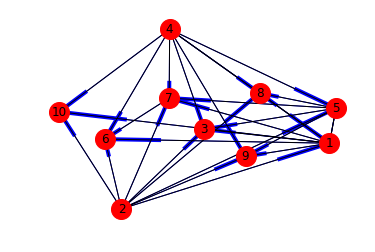

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.MultiDiGraph()
G.add_edges_from(
    [('1', '1'), ('1', '3'), ('1', '5'), ('1', '6'), ('1', '7'),
     ('1', '8'), ('1', '9'),('1', '10'),('2', '1'), ('2', '3'), ('2', '5'), ('2', '6'), ('2', '7'),
     ('2', '8'), ('2', '9'),('2', '10'),('4','1'),
     ('4','3'), ('4','5'),('4', '6'), ('4', '7'),
     ('4', '8'), ('4', '9'),('4', '10'),('5','1'),
     ('5','3'), ('5','5'),('5', '7'),
     ('5', '8'), ('5', '9'),('6', '6'),('7','6')])



# Specify the edges you want here


# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_size = 400)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='blue', arrows=True)
nx.draw_networkx_edges(G, pos, arrows=False)
limits=plt.axis('off')
plt.show()

### The corresponding stochastic matrix for the network above is shown below

In [4]:
from numpy import *
stochastic_Matrix= array([[1./8,0, 1./8,0, 1./8, 1./8, 1./8, 1./8, 1./8, 1./8],[1./8,0, 1./8,0, 1./8, 1./8, 1./8, 1./8, 1./8, 1./8],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ,[1./8,0, 1./8,0, 1./8, 1./8, 1./8, 1./8, 1./8, 1./8],[1./6,0, 1./6,0, 1./6,0, 1./6, 1./6, 1./6, 0],[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) 
print stochastic_Matrix

[[ 0.125       0.          0.125       0.          0.125       0.125       0.125
   0.125       0.125       0.125     ]
 [ 0.125       0.          0.125       0.          0.125       0.125       0.125
   0.125       0.125       0.125     ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.125       0.          0.125       0.          0.125       0.125       0.125
   0.125       0.125       0.125     ]
 [ 0.16666667  0.          0.16666667  0.          0.16666667  0.
   0.16666667  0.16666667  0.16666667  0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.  

In [6]:
from numpy import *
 
def pagerank(H):
    n= len(H)
    w = zeros(n)
    rho = 1./n * ones(n);
    for i in range(n):
      if multiply.reduce(H[i]== zeros(n)):
        w[i] = 1
    newH = H + outer((1./n * w),ones(n))
 
    theta=0.85
    G = (theta * newH) + ((1-theta) * outer(1./n * ones(n), ones(n)))
    print rho
    for j in range(10):
        rho = dot(rho,G)
        print rho

In [7]:
pagerank(stochastic_Matrix)

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
[ 0.09504167  0.049       0.09504167  0.049       0.09504167  0.250875
  0.09504167  0.09504167  0.09504167  0.080875  ]
[ 0.08008491  0.04611     0.08008491  0.04611     0.08008491  0.36064984
  0.08008491  0.08008491  0.08008491  0.06662068]
[ 0.07073717  0.04108441  0.07073717  0.04108441  0.07073717  0.43401635
  0.07073717  0.07073717  0.07073717  0.05939181]
[ 0.06435364  0.03808628  0.06435364  0.03808628  0.06435364  0.48337304
  0.06435364  0.06435364  0.06435364  0.05433254]
[ 0.06007612  0.03602845  0.06007612  0.03602845  0.06007612  0.51652703
  0.06007612  0.06007612  0.06007612  0.05095935]
[ 0.05720087  0.03465096  0.05720087  0.03465096  0.05720087  0.53880277
  0.05720087  0.05720087  0.05720087  0.04869009]
[ 0.05526926  0.03372488  0.05526926  0.03372488  0.05526926  0.55376889
  0.05526926  0.05526926  0.05526926  0.0471658 ]
[ 0.05397146  0.03310275  0.05397146  0.03310275  0.05397146  0.56382408
  0.05397146  0.

#### From the above ranking algorithm it can be seen that  the above it can be seen that 
#### links 1,2,4,5 has highest ranking with 0.09504
#### links 6,7 stood second with  0.0707
#### links 3,8,9,10 has the least rankings with 0.0324

### Top 5 URLs

http://www.foxnews.com/politics.html

http://www.foxnews.com/world/2017/11/18/signals-may-be-from-missing-sub-argentinas-navy-says.html

http://www.foxnews.com/about/apps-downloads

http://video.foxnews.com/playlist/entertainment-latest-entertainment/

http://video.foxnews.com/v/5646127682001/




### Hits Algorithm

In [8]:
def hits(A):
    n= len(A)
    Au= dot(transpose(A),A)
    Hu = dot(A,transpose(A))
    a = ones(n); h = ones(n)
    print a,h
    for j in range(5):
        a = dot(a,Au)
        a= a/sum(a)
        h = dot(h,Hu)
        h = h/ sum(h)
        print a,h

In [9]:
H2= array([[1./8,0, 1./8,0, 1./8, 1./8, 1./8, 1./8, 1./8, 1./8],[1./8,0, 1./8,0, 1./8, 1./8, 1./8, 1./8, 1./8, 1./8],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ,[1./8,0, 1./8,0, 1./8, 1./8, 1./8, 1./8, 1./8, 1./8],[1./6,0, 1./6,0, 1./6,0, 1./6, 1./6, 1./6, 0],[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [12]:
hits(H2)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.09027778  0.          0.09027778  0.          0.09027778  0.39583333
  0.09027778  0.09027778  0.09027778  0.0625    ] [ 0.09944751  0.09944751  0.          0.09944751  0.0718232   0.31491713
  0.31491713  0.          0.          0.        ]
[ 0.04926335  0.          0.04926335  0.          0.04926335  0.66712707
  0.04926335  0.04926335  0.04926335  0.03729282] [ 0.0710826   0.0710826   0.          0.0710826   0.02801414  0.37936903
  0.37936903  0.          0.          0.        ]
[ 0.031325    0.          0.031325    0.          0.031325    0.78539403
  0.031325    0.031325    0.031325    0.02665598] [ 0.0632235   0.0632235   0.          0.0632235   0.01584381  0.39724285
  0.39724285  0.          0.          0.        ]
[ 0.02634945  0.          0.02634945  0.          0.02634945  0.81819451
  0.02634945  0.02634945  0.02634945  0.02370881] [ 0.06134251  0.06134251  0.          0.06134251  0.012

## Hits algorithm on connectivity matrix

In [11]:
A2 = array([[1,0,1,0,1,1,1,1,1,1],
[1,0,1,0,1,1,1,1,1,1],
[0,0,0,0,0,0,0,0,0,0],
[1,0,1,0,1,1,1,1,1,1],
[1,0,1,0,1,0,1,1,1,0],
[0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0]])
hits(A2)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.13043478  0.          0.13043478  0.          0.13043478  0.11304348
  0.13043478  0.13043478  0.13043478  0.10434783] [ 0.24615385  0.24615385  0.          0.24615385  0.18461538  0.03846154
  0.03846154  0.          0.          0.        ]
[ 0.13078773  0.          0.13078773  0.          0.13078773  0.1115454
  0.13078773  0.13078773  0.13078773  0.1037282 ] [ 0.24932396  0.24932396  0.          0.24932396  0.19469984  0.02866414
  0.02866414  0.          0.          0.        ]
[ 0.13081703  0.          0.13081703  0.          0.13081703  0.1114044
  0.13081703  0.13081703  0.13081703  0.10369339] [ 0.24950399  0.24950399  0.          0.24950399  0.19574739  0.02787033
  0.02787033  0.          0.          0.        ]
[ 0.13081962  0.          0.13081962  0.          0.13081962  0.11139168
  0.13081962  0.13081962  0.13081962  0.10369062] [ 0.2495183   0.2495183   0.          0.2495183   0.19584